### Camera calibration math   20221230  CJH
* predict intrinsics so you can get a good intrinsic matrix estimate

In [6]:
import cv2  # image acquisition and manipulation
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import glob
import pandas as pd

___
#### predicting intrinsics
* the MS lifecam 3000 is supposed to have a diagonal FOV of 68.5 ish degrees
  * 1280x720 fov is therefore (59.7, 33.6) degrees in theory
  * but measured it's more like (60.2, 36.1)
* 640x480 and other 4:3 are likely (44.8, 33.6) degrees
  * that's if you cropped x to retain full y from the 1280, but that's not accurate (y gets more rows in the 4:3)
  * i measured as (50.1, 39.4)

In [7]:
def predict_intrinsics(w, h, fov_x, fov_y, fov_diag=None):
    # ToDo - make a fov x,y guess if fed a diagonal fov
    fx_predicted =  0.5 * w / np.tan(0.5 * np.deg2rad(fov_x)) 
    fy_predicted =  0.5 * h / np.tan(0.5 * np.deg2rad(fov_y)) 
    cx = w//2
    cy = h//2
    apriltag_intrinsics = [round(fx_predicted,1), round(fy_predicted,1), cx, cy]
    print(f'({w}x{h}) with x_fov {fov_x}° and y_fov {fov_y}° predicts nominal values of:')
    print(f'fx:{fx_predicted:4.1f}  fy:{fy_predicted:4.1f}  cx:{cx:3d}  cy:{cy:3d}')
    print(f'use the following with apriltag detector: {apriltag_intrinsics}')
    return [round(fx_predicted,1), round(fy_predicted,1), cx, cy]

In [8]:
predict_intrinsics(1280, 720, 60.2, 36.1)

(1280x720) with x_fov 60.2° and y_fov 36.1° predicts nominal values of:
fx:1104.1  fy:1104.7  cx:640  cy:360
use the following with apriltag detector: [1104.1, 1104.7, 640, 360]


[1104.1, 1104.7, 640, 360]

In [9]:
predict_intrinsics(640, 480, 50.1, 39.4)

(640x480) with x_fov 50.1° and y_fov 39.4° predicts nominal values of:
fx:684.7  fy:670.3  cx:320  cy:240
use the following with apriltag detector: [684.7, 670.3, 320, 240]


[684.7, 670.3, 320, 240]

In [10]:
predict_intrinsics(320, 240, 50.1, 39.4)

(320x240) with x_fov 50.1° and y_fov 39.4° predicts nominal values of:
fx:342.3  fy:335.1  cx:160  cy:120
use the following with apriltag detector: [342.3, 335.1, 160, 120]


[342.3, 335.1, 160, 120]

In [18]:
predict_intrinsics(352, 288, 114, round(114*288/352,1))

(352x288) with x_fov 114° and y_fov 93.3° predicts nominal values of:
fx:114.3  fy:135.9  cx:176  cy:144
use the following with apriltag detector: [114.3, 135.9, 176, 144]


[114.3, 135.9, 176, 144]

___
### camera math
* units are usually in multiples of focal length, ~ same for x and y
  * it would be a strange lens if it weren't - the aspect ratio makes fx and fy nominally the same
* real-space value of z at the image plane is 1 (one focal length)

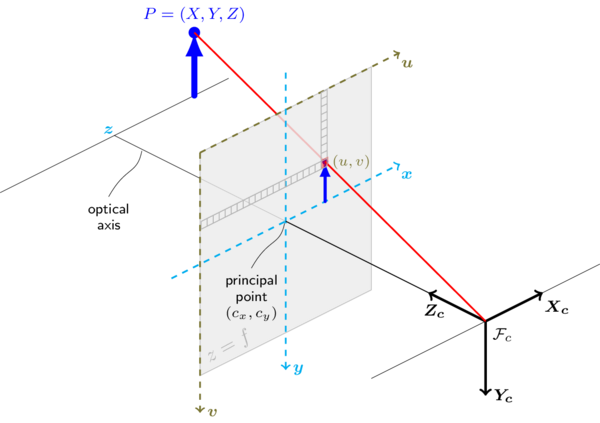

In [11]:
np.set_printoptions(precision=2, suppress=True)

In [12]:
real_location = np.array([0.9,0,1]).reshape(3,1)
intrinsics = [1104.1, 1104.7, 640, 360]
camera_matrix = np.array([
    [intrinsics[0],0,intrinsics[2]],
    [0,intrinsics[1],intrinsics[3]],
    [0,0,1]])
camera_matrix

array([[1104.1,    0. ,  640. ],
       [   0. , 1104.7,  360. ],
       [   0. ,    0. ,    1. ]])

In [13]:
real_location = np.array([-0.5797,-0.3259,1]).reshape(3,1)
real_location = np.array([0.5797,0.3259,1]).reshape(3,1)
real_location = np.array([0.0,0,1]).reshape(3,1)
np.matmul(camera_matrix, real_location)

array([[640.],
       [360.],
       [  1.]])